In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import reuters
from keras.preprocessing import sequence


In [45]:
num_words = 1000
(train_x, train_y), (test_x, test_y) = (
    tf.keras.datasets
    .reuters.load_data(num_words=num_words)
)
n_labels = np.unique(train_y).shape[0]
print(train_x.shape, test_x.shape)

(8982,) (2246,)


In [36]:
print([len(x) for x in train_x[0:5]])
print(n_labels)
print('train y: ', train_y.shape, type(train_y))
print('test y: ', test_y.shape)

[87, 56, 139, 224, 101]
46
train y:  (8982,) <class 'numpy.ndarray'>
test y:  (2246,)


In [46]:
from keras.utils import np_utils
train_y_cat = np_utils.to_categorical(y=train_y, num_classes=n_labels)
test_y_cat = np_utils.to_categorical(y=test_y, num_classes=n_labels)

print(train_y_cat.shape)
print(train_y_cat[0])

train_x_padded = tf.keras.preprocessing.sequence.pad_sequences(train_x, maxlen=20)
test_x_padded = tf.keras.preprocessing.sequence.pad_sequences(test_x, maxlen=20)

print('train x', train_x.shape)
print([len(x) for x in train_x[0:5]])
print(train_x[0])
print('train x padded', train_x_padded.shape)
print([len(x) for x in train_x_padded[0:5]])
print(train_x_padded[0])


(8982, 46)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
train x (8982,)
[87, 56, 139, 224, 101]
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
train x padded (8982, 20)
[20, 20, 20, 20, 20]
[ 44  11  15  16   8 197   2  90  67  52  29 209  30  32 132   6 109  15
  17  12]


In [44]:
# Create a list of sequences
sequences = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Pad the sequences to the same length
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=2)

# Print the padded sequences
print(padded_sequences)

[[2 3]
 [5 6]
 [8 9]]


In [80]:
from tensorflow.keras import layers
model = tf.keras.Sequential(
    [
     layers.Embedding(
         input_dim=num_words, # number of vocaburary (max int)
         output_dim=6,
         input_length=20),
     layers.Flatten(),
     layers.Dense(256),
     layers.Dropout(0.25),
     layers.Activation('relu'),
     layers.Dense(n_labels),
     layers.Activation('softmax')
    ]
)

model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])
model_fit = model.fit(train_x_padded, train_y_cat,
          validation_data=(test_x_padded, test_y_cat),
          batch_size=128, epochs=20, verbose=0)


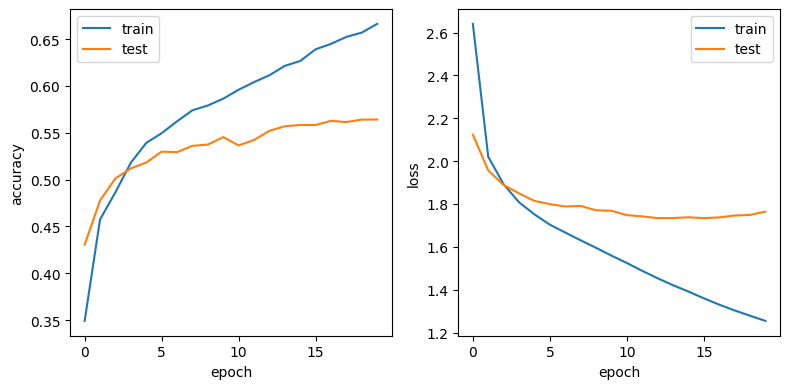

In [81]:
import matplotlib.pylab as plt
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(model_fit.history['accuracy'], label='train')
plt.plot(model_fit.history['val_accuracy'], label='test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(122)
plt.plot(model_fit.history['loss'], label='train')
plt.plot(model_fit.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.tight_layout()
plt.show()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 100)]        0                                            
__________________________________________________________________________________________________
lambda_8 (Lambda)               (None, 100)          0           input_17[0][0]                   
                                                                 input_18[0][0]                   
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/5
32/32 [===============

In [93]:
history.history

{'loss': [0.31782639026641846,
  0.31782636046409607,
  0.31782639026641846,
  0.31782639026641846,
  0.31782636046409607]}